# *Problem 1. Neural Networks*

### *Develop a Neural Network (NN) model to predict class labels for the Iris data set. Split the data into training, validation and testing set with the ratio of 0.8, 0.1 and 0.1. Train the model on the training set, select the best  model  based  on  the  validation  set,  and  test  your  model  on  the  testing  set.  Report  your  training, validation and testing accuracy. You can use packages such as Tensorflow or Pytorch.* 

## Using Pytorch to define our neural network


*   Two Hidden Layers
*   ReLU Activation Function



In [1]:
import torch
import torch.nn as NeuralNet

class neural_network(NeuralNet.Module):
    
    # There are two hidden layers in our network denoted by h1 and h2
    # ReLU is used as the activation function
    def __init__(self, numoffeatures, h1, h2,output):
        super(neural_network, self).__init__()
        self.first   = NeuralNet.Linear(numoffeatures, h1)
        self.relu1 = NeuralNet.ReLU()
        self.second   = NeuralNet.Linear(h1, h2)
        self.relu2 = NeuralNet.ReLU()
        self.third   = NeuralNet.Linear(h2, output)    

    def forward(self, x):
        out = self.first(x)
        out = self.relu1(out)
        out = self.second(out)
        out = self.relu2(out)
        out = self.third(out)
        
        return out

## Deciding the parameters i.e. Input Attributes, Number of nodes in the Hidden Layer and Output Classes

In [2]:
# First layer of our network
# 4 attributes as input: 'sepal lenght', 'sepal width', 'petal lenght', 'petal width'
numoffeatures = 4 

# Number of nodes in 1st and 2nd hidden layers
h1 = 5
h2 = 9

# Last layer of our network
# Output Classes: 'Setosa', 'Versicolour', 'Virginica'
numofclasses = 3

# Number of iterations for backpropagation
epochs = 30

## Implemening our Neural Network

In [3]:
lr = 0.01 
m = neural_network(numoffeatures,h1,h2,numofclasses)

#choosing optimizer and desired loss function
criterion = NeuralNet.CrossEntropyLoss()
# Stochastic Optimization
optimizer = torch.optim.Adam(m.parameters(), lr=lr)

## Loading and splitting the Iris dataset into training, validation and testing set

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x , y = iris.data, iris.target

# First splitting dataset into train and test with ratio as 0.8 and 0.2
train_x , test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

# Now splitting the test 'equally' into test and validation
# Hence our dataset is in ratio train:test:val = 0.8:0.1:0.1 
test_x , val_x , test_y , val_y = train_test_split(test_x, test_y, test_size=0.5, random_state=1)

## Getting tensors and creating loaders for training, validation and testing set

In [5]:
import torch.utils.data as utils
import torch.utils.data as td

# Training
train_x_tnsr = torch.Tensor(train_x).float()
train_y_tnsr = torch.Tensor(train_y).long()

iris_train_tnsr = utils.TensorDataset(train_x_tnsr,train_y_tnsr)

train_data_loader = td.DataLoader(iris_train_tnsr, batch_size=10, shuffle=True, num_workers=1)

# Validation
val_x_tnsr = torch.Tensor(val_x).float()
val_y_tnsr = torch.Tensor(val_y).long()
iris_val_tnsr = utils.TensorDataset(val_x_tnsr,val_y_tnsr)
val_data_loader = td.DataLoader(iris_val_tnsr, batch_size=10, shuffle=True, num_workers=1)

# Testing
test_x_tnsr = torch.Tensor(test_x).float()
test_y_tnsr = torch.Tensor(test_y).long()

iris_test_tnsr = utils.TensorDataset(test_x_tnsr,test_y_tnsr)

test_data_loader = td.DataLoader(iris_test_tnsr, batch_size=10, shuffle=True, num_workers=1)

## Defining function to get training loss and validation loss

In [6]:
def train(model, loader, loader1, criterion, optimizer):
    
    model.train()
    
    t_loss = 0
    v_loss = 0
    
    for b, tnsr in enumerate(loader):
        curr_data, curr_target = tnsr
        # Gradients = 0
        optimizer.zero_grad()
        next = model(curr_data)
        loss = criterion(next, curr_target)
        # calculating gradients
        loss.backward()
        # Updating weights
        optimizer.step()
        t_loss = t_loss + loss.item()
    
    # evaluating our model
    model.eval()
    for b, tnsr in enumerate(loader1):
        curr_data, curr_target = tnsr
        next = model(curr_data)
        loss = criterion(next, curr_target)
        v_loss = v_loss + loss.item()
        
        
    # Return loss
    avg_loss_t = t_loss / len(loader.dataset)
    avg_loss_v = v_loss / len(loader1.dataset)
    return avg_loss_t, avg_loss_v

## Defining function to get testing loss

In [7]:
def test(model, loader, criterion):

    # evaluate model
    model.eval()

    t_loss = 0
    count = 0

    with torch.no_grad():
        for b, tnsr in enumerate(loader):
            curr_data, curr_target = tnsr

            # find answer by passing data through model
            output = model(curr_data)

            # find loss
            t_loss = t_loss + criterion(output, curr_target).item()

            # find accuracy
            _, prediction = torch.max(output, 1)
            count = count + torch.sum(curr_target == prediction).item()


    avg_acc = count / len(loader.dataset)
    avg_loss = t_loss / len(loader.dataset)
    
    return avg_acc, avg_loss


## Using the Neural Network

In [8]:
enums = []
tr_losses = []
val_losses = []


for epoch in range(epochs):
    
    # Model Training
    tr_loss, val_loss = train(m, train_data_loader, val_data_loader, criterion, optimizer)
    
    enums.append(epoch)
    tr_losses.append(tr_loss)
    val_losses.append(val_loss)
    print("Epoch ",epoch+1,":")
    print("Training Loss :",tr_loss," Validation Loss :",val_loss)


Epoch  1 :
Training Loss : 0.10705265055100123  Validation Loss : 0.14220394293467203
Epoch  2 :
Training Loss : 0.09667361279328664  Validation Loss : 0.13526658217112222
Epoch  3 :
Training Loss : 0.07971962640682856  Validation Loss : 0.11040416161219278
Epoch  4 :
Training Loss : 0.06264254475633303  Validation Loss : 0.0895259658495585
Epoch  5 :
Training Loss : 0.046967687209447224  Validation Loss : 0.07528030077616374
Epoch  6 :
Training Loss : 0.03781860868136088  Validation Loss : 0.05907368858655294
Epoch  7 :
Training Loss : 0.03383137459556262  Validation Loss : 0.06933768192927042
Epoch  8 :
Training Loss : 0.0269201813886563  Validation Loss : 0.04795589645703634
Epoch  9 :
Training Loss : 0.022996486350893974  Validation Loss : 0.05874242385228475
Epoch  10 :
Training Loss : 0.020203165896236896  Validation Loss : 0.037839305400848386
Epoch  11 :
Training Loss : 0.017768767413993677  Validation Loss : 0.03512387077013652
Epoch  12 :
Training Loss : 0.015824378778537113 

## Plotting the training loss and validation loss

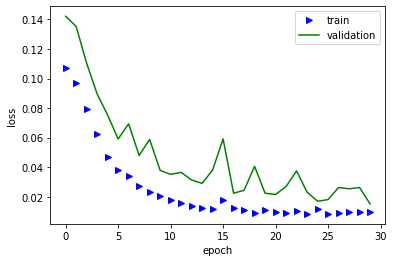

In [9]:
from matplotlib import pyplot as plt

plt.plot(enums, tr_losses,'b>')
plt.plot(enums, val_losses,'g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

## Confusion Matrix and Accuracy

Accuracy : 100.0
Test Loss:  0.003638163829843203


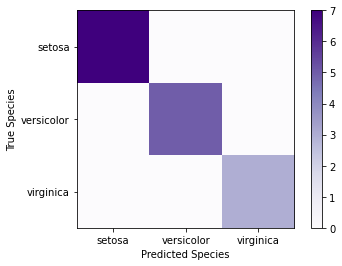

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

accuracy, tst_loss = test(m, test_data_loader, criterion)

print("Accuracy :",accuracy * 100)
print("Test Loss: ",tst_loss)

# set model to evaluate mode
m.eval()

# get predictions
x = torch.Tensor(test_x).float()
_, predicted = torch.max(m(x).data, 1)

# Getting confusion matrix
k = accuracy_score(test_y, predicted.numpy())

cm = confusion_matrix(test_y, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Purples)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()